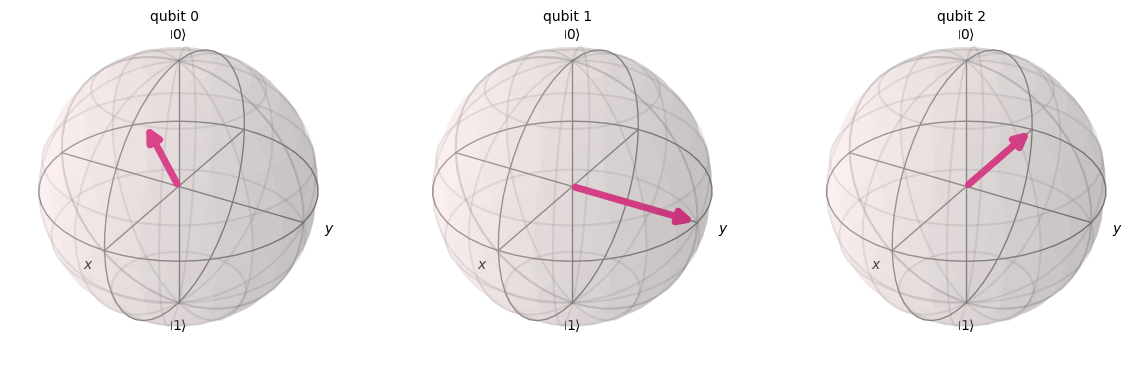

In [24]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from math import pi
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator, SamplerV2 as Sampler
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft_rotations(circuit, n):
    """Performs QFT on the first n qubits in the circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

def qft(circuit, n):
    """QFT on the first n qubits in the circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# THIS IS ENCODING THE INPUT WHICH WILL BE QUANTUM TRANSFORMED
qc = QuantumCircuit(3)  # Add classical bits for measurement

# Encode the number 5 (which is '101' in binary) into the qubits
qc.x(0)
qc.x(2)

# Draw the circuit to visualize the initial state
nqubits = 3
number = 5
# Apply QFT
qft(qc, 3)


# USING SIMULATOR TO RUN THE TRANSFORMATION
usim = Aer.get_backend('aer_simulator')
qc.save_statevector()

# Transpile !
transpiled_q = transpile(qc, usim)

# Run the circuit on the unitary simulator backend
job_sim = usim.run(transpiled_q)
result_sim = job_sim.result()

# final statevector
final_state = result_sim.get_statevector(transpiled_q)

# Plot the Bloch multivector
plot_bloch_multivector(final_state)


